In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)

squaregridmodule = SquareGridModule(center,orientation_offset,f,non_negative=False,add=True)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

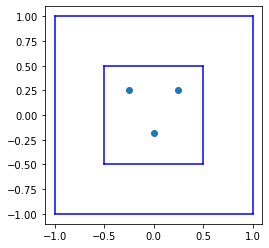

In [4]:
#phases = center[None]
#phases = squaregridmodule.inner_square.sample(3)
#phases = np.stack([center] + [np.array([2*0.5/f, 0])] + [np.array([0, 2*0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.5/f, 0])] + [np.array([0, 0.5/f])],axis=0)
#phases = np.stack([center] + [center] + [np.array([0.5/f, 0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [center],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
phases = np.stack([np.array([0,-0.25/(f*np.sqrt(2))])] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)

# check periodicity (see ratemaps below) of the inner square. x=0.5=1.5 for f=1
#phases = np.stack([center] + [np.array([-0.25/f, 0])] + [np.array([0.75/f, 0])],axis=0)



squaregridmodule.init_module(phases)
squaregridmodule.plot()

In [5]:
ratemaps = squaregridmodule(board).T
ratemaps.shape

(64, 64, 3)

0.24419188131387573

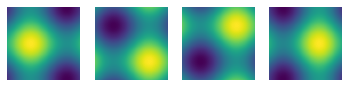

In [6]:
#plt.plot(data.reshape(-1,3))
fig,axs = plt.subplots(ncols=4)
for i,ax in enumerate(axs[:-1]):
    ax.imshow(ratemaps[...,i])
    ax.axis('off')
axs[-1].imshow(np.sum(ratemaps,axis=-1))
axs[-1].axis('off')
np.std(np.sum(ratemaps,axis=-1))

(<Figure size 1008x1008 with 16 Axes>,
 array([[<Axes3DSubplot:title={'center':'azim=0.0, elev=0.0'}>,
         <Axes3DSubplot:title={'center':'azim=45.0, elev=0.0'}>,
         <Axes3DSubplot:title={'center':'azim=90.0, elev=0.0'}>,
         <Axes3DSubplot:title={'center':'azim=135.0, elev=0.0'}>],
        [<Axes3DSubplot:title={'center':'azim=0.0, elev=22.5'}>,
         <Axes3DSubplot:title={'center':'azim=45.0, elev=22.5'}>,
         <Axes3DSubplot:title={'center':'azim=90.0, elev=22.5'}>,
         <Axes3DSubplot:title={'center':'azim=135.0, elev=22.5'}>],
        [<Axes3DSubplot:title={'center':'azim=0.0, elev=45.0'}>,
         <Axes3DSubplot:title={'center':'azim=45.0, elev=45.0'}>,
         <Axes3DSubplot:title={'center':'azim=90.0, elev=45.0'}>,
         <Axes3DSubplot:title={'center':'azim=135.0, elev=45.0'}>],
        [<Axes3DSubplot:title={'center':'azim=0.0, elev=67.5'}>,
         <Axes3DSubplot:title={'center':'azim=45.0, elev=67.5'}>,
         <Axes3DSubplot:title={'center'

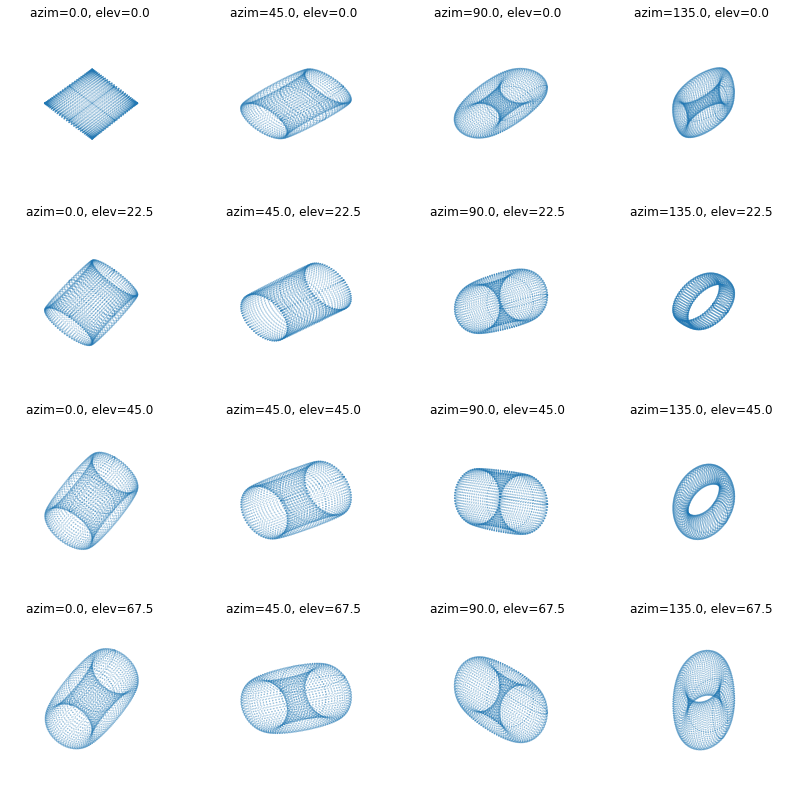

In [16]:
scatter3d(ratemaps, nrows=4, ncols=4, s=0.1, alpha=0.5, figsize=(14,14))